In [7]:
## decision tree classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train_nohe.npy', allow_pickle = True)
y_test = np.load('../data/y_test.npy', allow_pickle = True)

In [8]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train.npy', allow_pickle = True)
y_test = np.load('../data/y_test.npy', allow_pickle = True)

In [9]:
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_train: ", y_train.shape)
print("shape of Y_test: ", y_test.shape)

shape of X_train:  (122289, 1044)
shape of X_test:  (60232, 1044)
shape of Y_train:  (122289, 5)
shape of Y_test:  (60232, 5)


In [10]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

In [11]:
## decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
## predictions and evaluation

predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.53      0.52     35586
           1       0.83      0.72      0.77     35586
           2       0.88      0.73      0.80     35586
           3       0.72      0.65      0.69     35586
           4       0.49      0.53      0.51     35586

   micro avg       0.67      0.63      0.65    177930
   macro avg       0.69      0.63      0.66    177930
weighted avg       0.69      0.63      0.66    177930
 samples avg       0.63      0.63      0.63    177930



c:\Users\bobmst\.conda\envs\ds310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.6343224863710448


In [14]:
matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
matrix

array([[20918,  2194,  1509,  2728,  8237],
       [ 5254, 25694,   362,  1150,  3126],
       [ 5624,    91, 26072,  1170,  2629],
       [ 4809,   765,   949, 23226,  5837],
       [ 9805,  2134,   882,  3783, 18982]], dtype=int64)

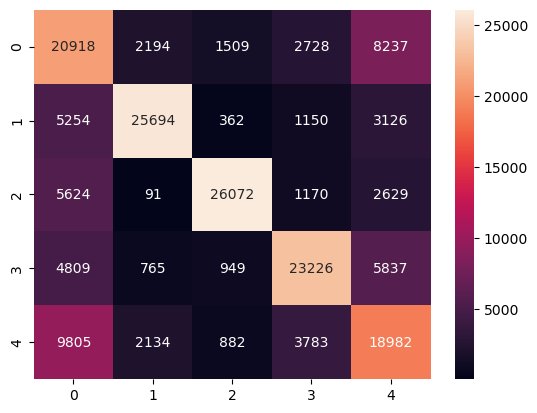

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()